In [1]:
import datasets


In [2]:
#fin min and max token length of the dataset
import numpy as np
ds_code = datasets.load_dataset("open-r1/Mixture-of-Thoughts", 'code', cache_dir="~/hf/datasets", download_mode='reuse_dataset_if_exists',split='train')
ds_math = datasets.load_dataset("open-r1/Mixture-of-Thoughts", 'math', cache_dir="~/hf/datasets", download_mode='reuse_dataset_if_exists',split='train')
# print(len(ds_code))

# print(ds_code[1]['messages'][0]['content'])
# # print(ds_code['source'])
# tokens = [ds_code[i]['num_tokens'] for i in range(len(ds_code))]
# print(min(tokens))
# print(max(tokens))
# print(sum(tokens)/len(tokens))
# print(np.median(tokens))

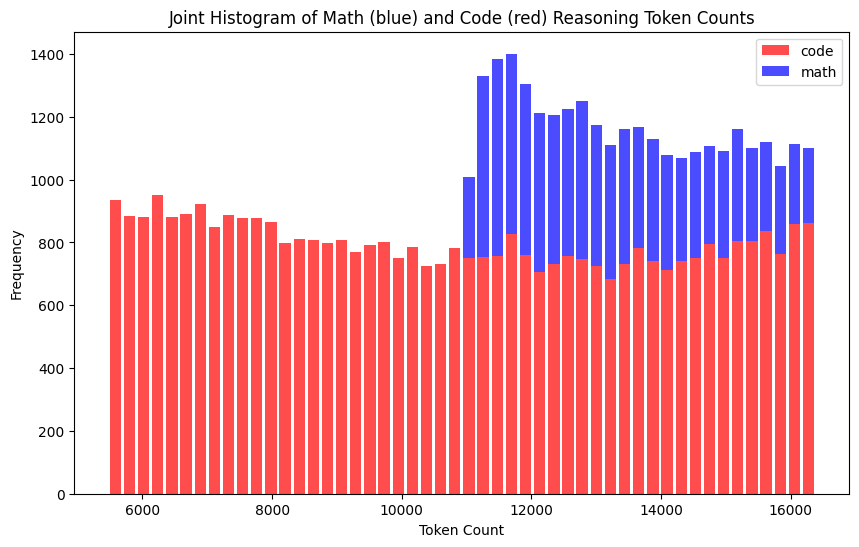

<Figure size 640x480 with 0 Axes>

In [10]:
ds_code_sorted = sorted([ds_code[i]['num_tokens'] for i in range(len(ds_code)) if ds_code[i]['num_tokens'] < 16384], reverse=True)[:40000]
ds_math_sorted = sorted([ds_math[i]['num_tokens'] for i in range(len(ds_math)) if ds_math[i]['num_tokens'] < 16384], reverse=True)[:10000]




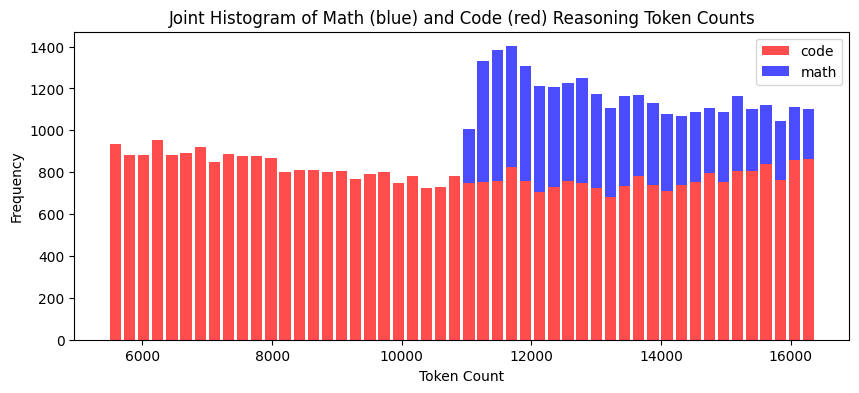

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist([ds_code_sorted, ds_math_sorted], bins=50, stacked=True, color=['red', 'blue'], label=['code', 'math'], alpha=0.7, histtype='bar', rwidth=0.8)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Joint Histogram of Math (blue) and Code (red) Reasoning Token Counts')
plt.legend()
# plt.show()
plt.savefig('../figs/reasoning_data_token_distribution.pdf')

In [9]:
print(sum(ds_code_sorted))
print(sum(ds_math_sorted))

431066879
133164351


In [3]:
import datasets
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B-Instruct", cache_dir='/root/hf/')
tokenizer.add_special_tokens({'pad_token': '<|fim_pad|>'})
ds = datasets.load_from_disk("/root/hf/datasets/sft_filtered_decontaminated_tokenized/")
print(tokenizer.decode(ds['train'][-1]['input_ids']))

<|im_start|>system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>
<|im_start|>user
10. Given that
$$
\begin{aligned}
\alpha+\beta+\gamma & =14 \\
\alpha^{2}+\beta^{2}+\gamma^{2} & =84 \\
\alpha^{3}+\beta^{3}+\gamma^{3} & =584
\end{aligned}
$$
find $\max \{\alpha, \beta, \gamma\}$.<|im_end|>
<|im_start|>assistant
<|im_start|>think
Okay, so I need to find the maximum value among α, β, and γ given these three equations. Let me start by writing down what's given:

1. α + β + γ = 14
2. α² + β² + γ² = 84
3. α³ + β³ + γ³ = 584

Hmm, I remember that there are some formulas relating sums of powers, maybe using Newton's identities or something. Let me think. If I can find the elementary symmetric sums, like the sum of the variables, sum of products two at a time, and the product of all three, then maybe I can form a cubic equation whose roots are α, β, γ. Then I could solve that cubic to find the individual values.

Right, so let's recall that:

For three variable

In [8]:
from datasets import load_from_disk

ds = load_from_disk("/root/hf/datasets/sft_filtered_decontaminated_tokenized/")

print(ds['train'][0]['text'])
print(ds['test'][0]['text'])

<|im_start|>system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>
<|im_start|>user
You will be given a competitive programming problem.
Analyze the maximum input constraints and identify the optimal algorithmic approach and data structures needed to process the largest possible test cases within the time and memory limits, then explain why your chosen implementation strategy is the most efficient solution. Please reason step by step about your solution approach, then provide a complete implementation in C++17 that is thoroughly optimized for both speed and memory usage.

Your solution must read input from standard input (cin), write output to standard output (cout).
Do not include any debug prints or additional output.

Put your final solution within a single code block:
```cpp
<your code here>
```

# Problem

Omkar is hosting tours of his country, Omkarland! There are $$$n$$$ cities in Omkarland, and, rather curiously, there are exactly $$$n-1$$$ bidire